## Code authored by Avik Chakraborty {- .unlisted}
### Problem Statement : 
#### This project focuses on the formulation of a machine learning program to predict the rating of oranges based on their quality.
### Objectives:
#### 1. Data Collection.
#### 2. Data Preprocessing : Cleaning, Feature Selection, Normalization.
#### 3. Model Building.
#### 4. Model Training.
#### 5. Model Evaluation and Analysis.
#### 6. Model Improvement : Hyperparameter tuning, Advanced techniques.
#### 7. Deployment using TensorFlow's 'Save' method.

### Importing the required libraries.

In [111]:
import pandas
import matplotlib.pyplot as mplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

### Data Collection
##### Loading the dataset.

In [2]:
dataset = pandas.read_csv('Orange Quality Data.csv')
dataset.shape

(241, 11)

In [3]:
dataset.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


### Data Preprocessing
#### Data Cleaning

##### Gathering the info of the dataset.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [5]:
dataset.isnull().values.any()

False

As we can see from the above outputs that the dataset have no null values.

In [6]:
dataset.count()

Size (cm)             241
Weight (g)            241
Brix (Sweetness)      241
pH (Acidity)          241
Softness (1-5)        241
HarvestTime (days)    241
Ripeness (1-5)        241
Color                 241
Variety               241
Blemishes (Y/N)       241
Quality (1-5)         241
dtype: int64

Since the count of the features is same throughout the dataset therefore there is no need for equalizing the column frequencies.

### Checking for the duplicate values.

In [7]:
dataset.duplicated().values.any()

False

There are no duplicate values in the dataset.

### Checking for missing values.

In [8]:
dataset.isna().values.any()

False

There are no missing values.

### Checking for outliers.
Creating a box plot for easier representation of all the features in the dataset, and thus will provide easier understanding of the dataset that whether there are any outliers present or not.

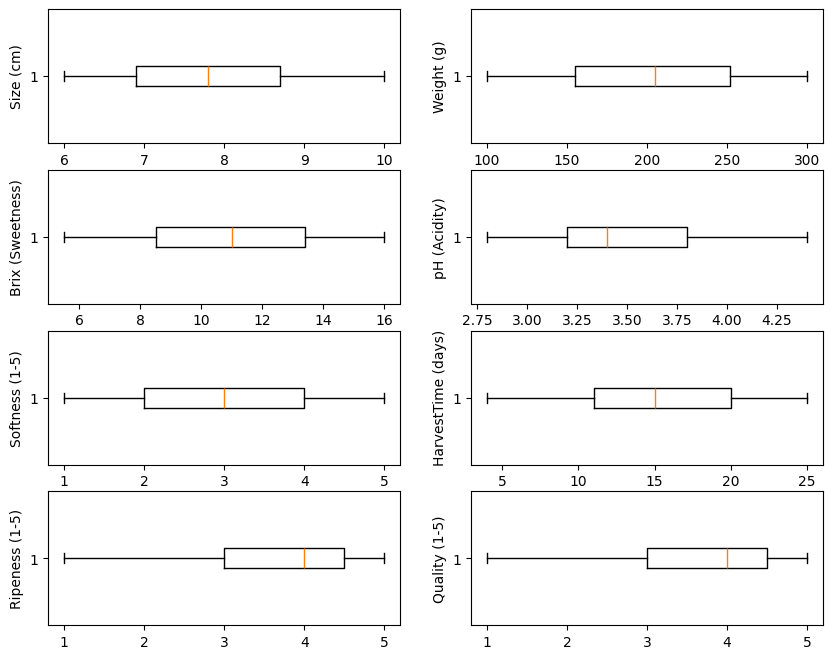

In [9]:
fig, axes = mplot.subplots(4, 2, figsize = (10, 8))

row = col = 0
for column in dataset.columns:
    if dataset[column].dtype.name != 'object':
        if col == 2:
            row += 1
            col = 0

        axes[row][col].boxplot(dataset[column], vert = False)
        axes[row][col].set_ylabel(column)
        
        col += 1

mplot.show()

There are no outliers present in the dataset.

### Data Normalization
##### Describing the dataset.

In [10]:
dataset.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


### Ploting the dataset.

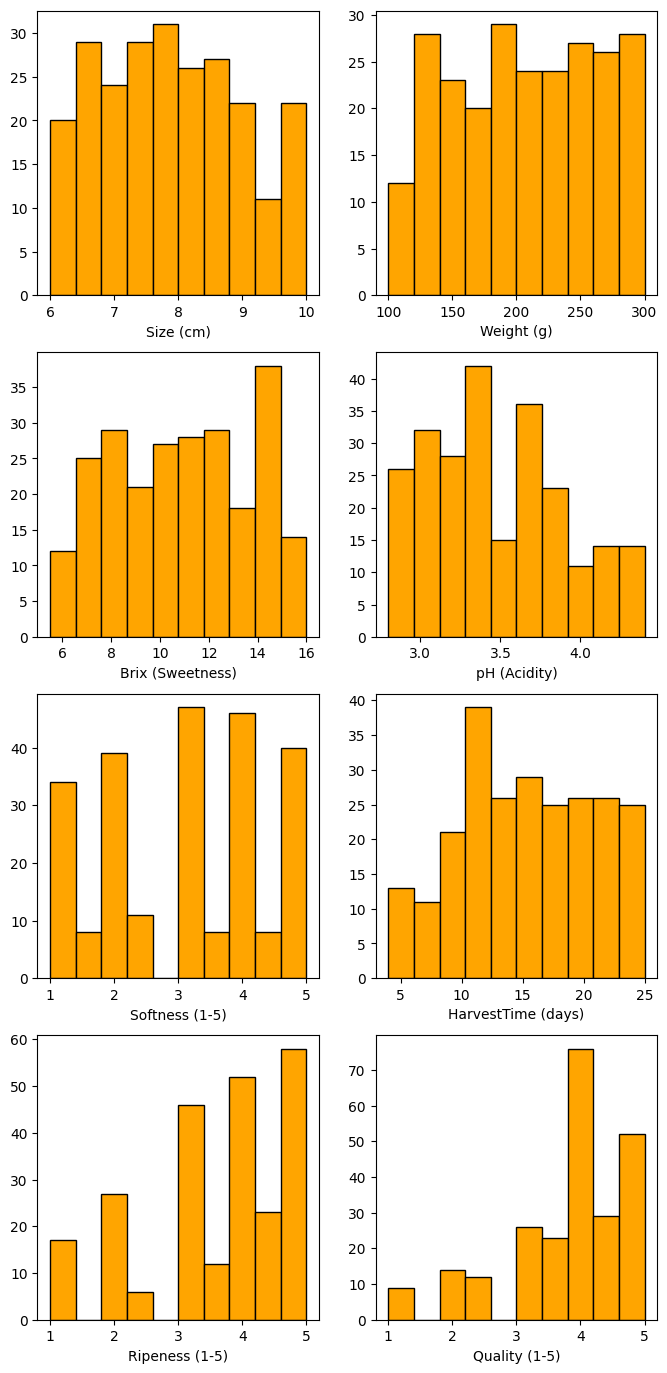

In [11]:
figure, axes = mplot.subplots(4, 2, figsize = (8, 17))

row = col = 0
for column in dataset.columns:
    if dataset[column].dtype.name != 'object':
        if col == 2:
            row += 1
            col = 0

        axes[row][col].hist(dataset[column], color = 'orange' , edgecolor = 'black')
        axes[row][col].set_xlabel(column)
        
        col += 1

mplot.show()

As we can see that the data columns does not follows Gausian Distribution, therefore Nomalization can be done.

#### Arranging the index of target column for easier manipulation.

In [12]:
droppedColumn = dataset.iloc[:, 10]
dataset = dataset.drop(columns = 'Quality (1-5)', axis = 1)
dataset.insert(7, column = 'Quality (1-5)', value = droppedColumn)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Quality (1-5)       241 non-null    float64
 8   Color               241 non-null    object 
 9   Variety             241 non-null    object 
 10  Blemishes (Y/N)     241 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [13]:
dataset.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5),Color,Variety,Blemishes (Y/N)
0,7.5,180,12.0,3.2,2.0,10,4.0,4.0,Orange,Valencia,N
1,8.2,220,10.5,3.4,3.0,14,4.5,4.5,Deep Orange,Navel,N
2,6.8,150,14.0,3.0,1.0,7,5.0,5.0,Light Orange,Cara Cara,N
3,9.0,250,8.5,3.8,4.0,21,3.5,3.5,Orange-Red,Blood Orange,N
4,8.5,210,11.5,3.3,2.5,12,5.0,4.5,Orange,Hamlin,Y (Minor)


In [14]:
dataset.iloc[:, :7]

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0
...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0
237,7.4,275,8.5,3.5,5.0,20,5.0
238,7.5,196,15.7,3.0,3.0,13,3.0
239,7.2,251,9.8,4.3,3.0,23,1.0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Quality (1-5)       241 non-null    float64
 8   Color               241 non-null    object 
 9   Variety             241 non-null    object 
 10  Blemishes (Y/N)     241 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


#### Arranging the dataset.
Arranging the dataset so that it is easier to normalize. Putting the target variable, i.e., Quality (1-5) column at last, so that it is easier to select the chunk of the dataset.

In [16]:
quality = dataset.iloc[:, 7]
dataset = dataset.drop(columns = 'Quality (1-5)', axis = 1)
dataset.insert(10, 'Quality (1-5)', quality)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [17]:
dataset.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


#### Normalizing the data in the dataset, as the data below have different ranges.

In [18]:
dataset.iloc[:, :7]

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0
...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0
237,7.4,275,8.5,3.5,5.0,20,5.0
238,7.5,196,15.7,3.0,3.0,13,3.0
239,7.2,251,9.8,4.3,3.0,23,1.0


In [19]:
scaler = MinMaxScaler()
scaledData = scaler.fit_transform(dataset.iloc[:, :7])

In [20]:
scaledData.shape

(241, 7)

##### Concatenating the rest of the columns to the newly formed scaled dataset.

In [21]:
scaledDataDF = pandas.DataFrame(data = scaledData, columns = dataset.iloc[:, :7].columns)
dataset1 = pandas.concat([scaledDataDF, dataset.iloc[:, 7:]], axis = 1)
dataset1.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,0.375,0.40,0.619048,0.2500,0.250,0.285714,0.750,Orange,Valencia,N,4.0
1,0.550,0.60,0.476190,0.3750,0.500,0.476190,0.875,Deep Orange,Navel,N,4.5
2,0.200,0.25,0.809524,0.1250,0.000,0.142857,1.000,Light Orange,Cara Cara,N,5.0
3,0.750,0.75,0.285714,0.6250,0.750,0.809524,0.625,Orange-Red,Blood Orange,N,3.5
4,0.625,0.55,0.571429,0.3125,0.375,0.380952,1.000,Orange,Hamlin,Y (Minor),4.5


In [22]:
dataset1.shape

(241, 11)

##### Plotting the difference between the data after and before Normalization

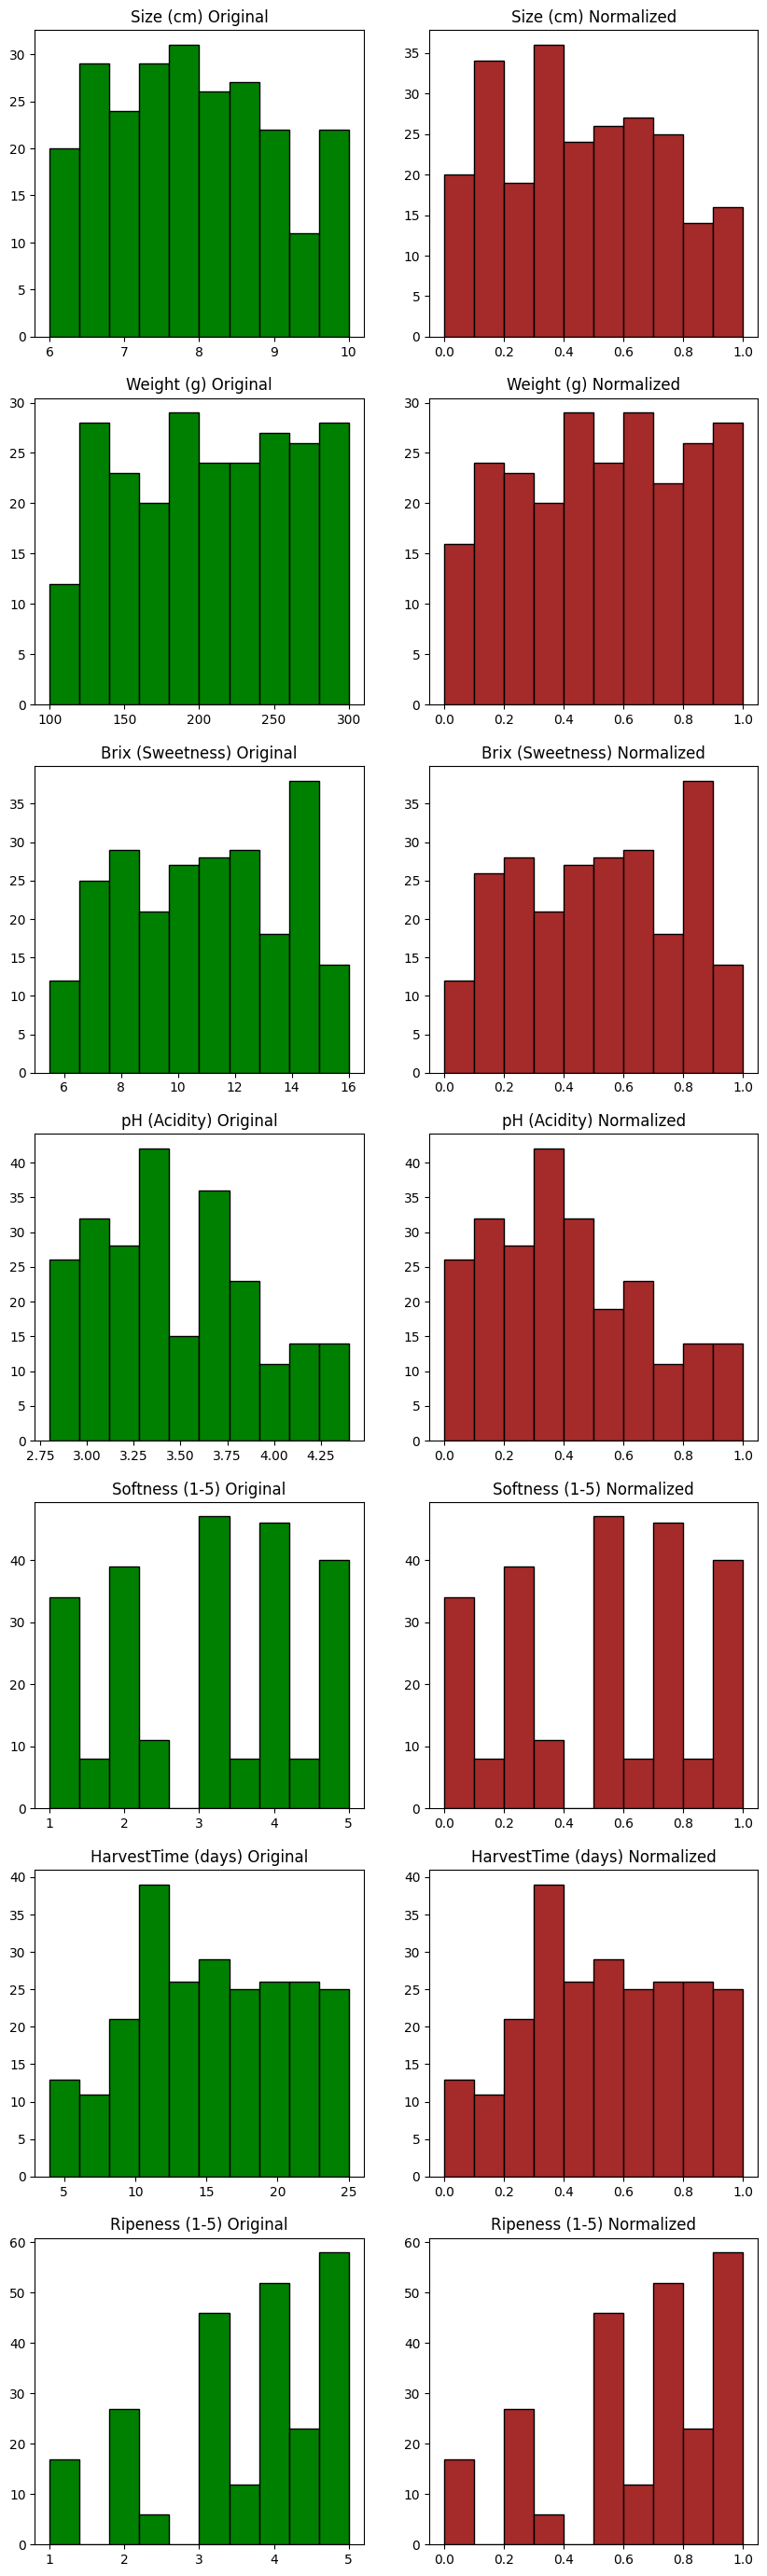

In [23]:
figure, axes = mplot.subplots(7, 2, figsize = (10, 35))

row = 0
for column in dataset.columns:
    if dataset[column].dtype.name != 'object' and column != 'Quality (1-5)':
        # Plotting the actual dataset.
        axes[row][0].set_title(column + ' Original')
        axes[row][0].hist(dataset[column], color = 'green', edgecolor = 'black')
        
        # Plotting the normalized dataset.
        axes[row][1].set_title(column + ' Normalized')
        axes[row][1].hist(dataset1[column], color = 'brown', edgecolor = 'black')
        
        row += 1

mplot.show()

##### From the plotting above we can see that there is not much significant change in the dataset before and after Normalization, except that all the values of different features are now under a same range

### Data Preparation
##### Handling Categorical Values.
Finding out the columns that have the categorical values.

In [24]:
# Renaming the Blemishes Column.
dataset.rename({'Blemishes (Y/N)' : 'Blemishes'}, inplace = True, axis = 1)
dataset1.rename({'Blemishes (Y/N)' : 'Blemishes'}, inplace = True, axis = 1)

In [25]:
dataset.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes', 'Quality (1-5)'],
      dtype='object')

In [26]:
dataset1.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes', 'Quality (1-5)'],
      dtype='object')

In [27]:
categoricalColumns = []

for columns in dataset1.columns:
    categoricalColumns.append(columns) if dataset1[columns].dtype.name == 'object' else None

categoricalColumns

['Color', 'Variety', 'Blemishes']

#### Finding the uniques values in the dataset.

In [28]:
for columns in categoricalColumns:
    print(dataset1[columns].unique())

['Orange' 'Deep Orange' 'Light Orange' 'Orange-Red' 'Yellow-Orange']
['Valencia' 'Navel' 'Cara Cara' 'Blood Orange' 'Hamlin' 'Tangelo (Hybrid)'
 'Murcott (Hybrid)' 'Moro (Blood)' 'Jaffa' 'Clementine' 'Washington Navel'
 'Star Ruby' 'Tangerine' 'Ambiance' 'California Valencia'
 'Honey Tangerine' 'Navel (Late Season)' 'Clementine (Seedless)' 'Temple'
 'Minneola (Hybrid)' 'Satsuma Mandarin' 'Midsweet (Hybrid)'
 'Navel (Early Season)' 'Ortanique (Hybrid)']
['N' 'Y (Minor)' 'Y (Sunburn)' 'Y (Mold Spot)' 'Y (Bruise)'
 'Y (Split Skin)' 'Y (Sunburn Patch)' 'Y (Scars)'
 'Y (Minor Insect Damage)' 'Y (Bruising)' 'N (Minor)' 'N (Split Skin)']


Since encoding this many unique values will result in incease in dimensions, therefore to reduce the dimention gouping some similar categorical values into one. E.g.: Navel, Washington Navel, Navel (Late Season) into one category as Navel.<br>
#### Handling the categorical values in Variety feature.

In [29]:
# Copying the scaled dataset
dataset2 = dataset1.copy()

# converting Washington Navel', 'Navel (Late Season)', 'Navel (Early Season) to Navel
for val in ['Washington Navel', 'Navel (Late Season)', 'Navel (Early Season)']:
    dataset2.iloc[dataset2.index[dataset2['Variety'] == val].values, 8] = 'Navel'

In [30]:
# Converting Valencia and California Valencia to Valencia
dataset2.iloc[dataset2.index['California Valencia' == dataset2['Variety']].values, 8] = 'Valencia'

In [31]:
# Converting Clementine and Clementine (Seedless) to Clementine
dataset2.iloc[dataset2.index['Clementine (Seedless)' == dataset2['Variety']].values, 8] = 'Clementine'

In [32]:
# Converting Tangerine and Honey Tangerine to Tangerine
dataset2.iloc[dataset2.index['Honey Tangerine' == dataset2['Variety']].values, 8] = 'Tangerine'

In [33]:
dataset2['Variety'].unique()

array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', 'Hamlin',
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Star Ruby', 'Tangerine', 'Ambiance', 'Temple',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Ortanique (Hybrid)'], dtype=object)

#### Handling the categorical values in Blemishes (Y/N) Column.

In [34]:
# Converting Y (Sunburn) and Y (Sunburn Patch) to Y (Sunburn)
dataset2.iloc[dataset2.index['Y (Sunburn Patch)' == dataset2['Blemishes']].values, 9] = 'Y (Sunburn)'

In [35]:
# Converting Y (Mold Spot) and Y (Minor Insect Damage) as Y (Organism Damage)
for val in ['Y (Mold Spot)', 'Y (Minor Insect Damage)']:
    dataset2.iloc[dataset2.index[val == dataset2['Blemishes']].values, 9] = 'Y (Organism Damage)'

In [36]:
# Converting Y (Bruise), Y (Split Skin), Y (Scars) and Y (Bruising) to Y (Damage)
for val in ['Y (Bruise)', 'Y (Split Skin)', 'Y (Scars)', 'Y (Bruising)']:
    dataset2.iloc[dataset2.index[val == dataset2['Blemishes']].values, 9] = 'Y (Damage)'

In [37]:
dataset2['Blemishes'].unique()

array(['N', 'Y (Minor)', 'Y (Sunburn)', 'Y (Organism Damage)',
       'Y (Damage)', 'N (Minor)', 'N (Split Skin)'], dtype=object)

#### Encoding the categorical values in the columns in the new copied dataset named as dataset2.

In [38]:
encoder = OneHotEncoder(sparse_output = False)

# for columns in categoricalColumns:
# Transforming the categorical columns to the encoded binary columns.
encodedColumns = encoder.fit_transform(dataset2[categoricalColumns])

# Converting the sparse matrix to dataframe
encodedDF = pandas.DataFrame(encodedColumns, columns = encoder.get_feature_names_out(categoricalColumns))

In [39]:
encodedDF.shape

(241, 30)

Now we need to concateneate the two datasets (original and the encoded) and then drop the original categorical columns, as we do not need those columns any more. The future calculations will be done using these new encoded columns of categorical features.

In [40]:
# Concateneating the two datasets
dataset2_Encoded = pandas.concat([dataset2, encodedDF], axis = 1)

In [41]:
# Droping the orginal categorical rows.
dataset2_Encoded = dataset2_Encoded.drop(categoricalColumns, axis = 1)
dataset2_Encoded.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5),Color_Deep Orange,Color_Light Orange,...,Variety_Tangerine,Variety_Temple,Variety_Valencia,Blemishes_N,Blemishes_N (Minor),Blemishes_N (Split Skin),Blemishes_Y (Damage),Blemishes_Y (Minor),Blemishes_Y (Organism Damage),Blemishes_Y (Sunburn)
0,0.375,0.40,0.619048,0.2500,0.250,0.285714,0.750,4.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.550,0.60,0.476190,0.3750,0.500,0.476190,0.875,4.5,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200,0.25,0.809524,0.1250,0.000,0.142857,1.000,5.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.750,0.75,0.285714,0.6250,0.750,0.809524,0.625,3.5,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625,0.55,0.571429,0.3125,0.375,0.380952,1.000,4.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Arranging the columns of dataset2_Encoded so that the target variable is at the last.

In [42]:
dataset2_Encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (cm)                      241 non-null    float64
 1   Weight (g)                     241 non-null    float64
 2   Brix (Sweetness)               241 non-null    float64
 3   pH (Acidity)                   241 non-null    float64
 4   Softness (1-5)                 241 non-null    float64
 5   HarvestTime (days)             241 non-null    float64
 6   Ripeness (1-5)                 241 non-null    float64
 7   Quality (1-5)                  241 non-null    float64
 8   Color_Deep Orange              241 non-null    float64
 9   Color_Light Orange             241 non-null    float64
 10  Color_Orange                   241 non-null    float64
 11  Color_Orange-Red               241 non-null    float64
 12  Color_Yellow-Orange            241 non-null    flo

In [43]:
quality = dataset2_Encoded.iloc[:, 7]
dataset2_Encoded = dataset2_Encoded.drop(columns = 'Quality (1-5)', axis = 1)
dataset2_Encoded.insert(37, 'Quality (1-5)', quality)
dataset2_Encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (cm)                      241 non-null    float64
 1   Weight (g)                     241 non-null    float64
 2   Brix (Sweetness)               241 non-null    float64
 3   pH (Acidity)                   241 non-null    float64
 4   Softness (1-5)                 241 non-null    float64
 5   HarvestTime (days)             241 non-null    float64
 6   Ripeness (1-5)                 241 non-null    float64
 7   Color_Deep Orange              241 non-null    float64
 8   Color_Light Orange             241 non-null    float64
 9   Color_Orange                   241 non-null    float64
 10  Color_Orange-Red               241 non-null    float64
 11  Color_Yellow-Orange            241 non-null    float64
 12  Variety_Ambiance               241 non-null    flo

#### Encoding the ungrouped categorical values in dataset1.

In [44]:
encoder = OneHotEncoder(sparse_output = False)

encodedColumns = encoder.fit_transform(dataset1[categoricalColumns])
encodedDF = pandas.DataFrame(encodedColumns, columns = encoder.get_feature_names_out(categoricalColumns))

dataset1_Encoded = pandas.concat([dataset1.iloc[:, :7], encodedDF], axis = 1)
dataset1_Encoded.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Blemishes_N (Split Skin),Blemishes_Y (Bruise),Blemishes_Y (Bruising),Blemishes_Y (Minor Insect Damage),Blemishes_Y (Minor),Blemishes_Y (Mold Spot),Blemishes_Y (Scars),Blemishes_Y (Split Skin),Blemishes_Y (Sunburn Patch),Blemishes_Y (Sunburn)
0,0.375,0.40,0.619048,0.2500,0.250,0.285714,0.750,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.550,0.60,0.476190,0.3750,0.500,0.476190,0.875,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200,0.25,0.809524,0.1250,0.000,0.142857,1.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.750,0.75,0.285714,0.6250,0.750,0.809524,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625,0.55,0.571429,0.3125,0.375,0.380952,1.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Adding the target column

In [45]:
dataset1_Encoded.insert(48, 'Quality (1-5)', quality)
dataset1_Encoded.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Blemishes_Y (Bruise),Blemishes_Y (Bruising),Blemishes_Y (Minor Insect Damage),Blemishes_Y (Minor),Blemishes_Y (Mold Spot),Blemishes_Y (Scars),Blemishes_Y (Split Skin),Blemishes_Y (Sunburn Patch),Blemishes_Y (Sunburn),Quality (1-5)
0,0.375,0.40,0.619048,0.2500,0.250,0.285714,0.750,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.550,0.60,0.476190,0.3750,0.500,0.476190,0.875,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,0.200,0.25,0.809524,0.1250,0.000,0.142857,1.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.750,0.75,0.285714,0.6250,0.750,0.809524,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
4,0.625,0.55,0.571429,0.3125,0.375,0.380952,1.000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.5


In [46]:
dataset1_Encoded.shape

(241, 49)

#### New encoded unnormalised and ungrouped encoded data from the original set into a new one.

In [47]:
dataset3 = pandas.concat([dataset.iloc[:, :7], dataset1_Encoded.iloc[:, 7:]], axis = 1)
dataset3.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Blemishes_Y (Bruise),Blemishes_Y (Bruising),Blemishes_Y (Minor Insect Damage),Blemishes_Y (Minor),Blemishes_Y (Mold Spot),Blemishes_Y (Scars),Blemishes_Y (Split Skin),Blemishes_Y (Sunburn Patch),Blemishes_Y (Sunburn),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.5


In [48]:
dataset3.shape

(241, 49)

#### New encoded unnormalised and grouped encoded data from the original set into a new one.

In [49]:
dataset4 = pandas.concat([dataset.iloc[:, :7], dataset2_Encoded.iloc[:, 7:]], axis = 1)
dataset4.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Variety_Temple,Variety_Valencia,Blemishes_N,Blemishes_N (Minor),Blemishes_N (Split Skin),Blemishes_Y (Damage),Blemishes_Y (Minor),Blemishes_Y (Organism Damage),Blemishes_Y (Sunburn),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.5


In [50]:
dataset4.shape

(241, 38)

## Note :
The reason for doing the OneHotEncoding for both the datasets is to check that using which set of data gives more accuracy, since the data in both the datasets have been prepared differently.

### Variable names and descriptions :
##### dataset : Holds the original unchanged dataset.
##### dataset1 : Normalization have been applied categorical values are ungrouped yet encoded.
##### dataset1_Encoded : Normalization have been applied and ungrouped-categorial values are encoded.
##### dataset2 : Normalization of data is done and Categorical values are grouped.
##### dataset2_Encoded : Normalization have been applied and grouped-categorical values are also encoded.
##### dataset3 : Unnormalized Ungrouped Encoded data.
##### dataset4 : Unnormalized Grouped Encoded data.

Now, The model preparation, training and prediction will be done on these datasets (dataset1_Encoded, dataset2_Encoded, dataset3, dataset4), and as per the highest accuracy of the results that particular combination will be chosen and the model on that dataset combination will be the final model for this project. The rest of the calculations will be held on basis of that.

### Model Building.
#### Dividing the model into training and testing data.
##### Model training for the 1st combination of dataset, i.e., dataset1_Encoded

In [51]:
X = dataset1_Encoded.iloc[:, :-1] # Input Features
Y = dataset1_Encoded.iloc[:, -1] # Target Output

In [52]:
# The input features
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Blemishes_N (Split Skin),Blemishes_Y (Bruise),Blemishes_Y (Bruising),Blemishes_Y (Minor Insect Damage),Blemishes_Y (Minor),Blemishes_Y (Mold Spot),Blemishes_Y (Scars),Blemishes_Y (Split Skin),Blemishes_Y (Sunburn Patch),Blemishes_Y (Sunburn)
0,0.375,0.400,0.619048,0.2500,0.250,0.285714,0.750,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.550,0.600,0.476190,0.3750,0.500,0.476190,0.875,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200,0.250,0.809524,0.1250,0.000,0.142857,1.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.750,0.750,0.285714,0.6250,0.750,0.809524,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625,0.550,0.571429,0.3125,0.375,0.380952,1.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.500,0.470,0.514286,0.5000,1.000,0.428571,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
237,0.350,0.875,0.285714,0.4375,1.000,0.761905,1.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,0.375,0.480,0.971429,0.1250,0.500,0.428571,0.500,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
239,0.300,0.755,0.409524,0.9375,0.500,0.904762,0.000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# The target output
Y

0      4.0
1      4.5
2      5.0
3      3.5
4      4.5
      ... 
236    5.0
237    4.0
238    5.0
239    3.0
240    4.0
Name: Quality (1-5), Length: 241, dtype: float64

## Note
#### The dictionaries holds the following structure : { random_state : accuracy }

##### Using UDF to find the best split of the dataset and then finding the accuracy to select the best model.

##### For dataset1_Encoded : Normalized Ungrouped Categorical dataset.

In [54]:
D1E_accuracy = {}
D2E_accuracy = {}
D3_accuracy = {}
D4_accuracy = {}

In [55]:
def predicting_D1E(): # D1E stands for : dataset1_Encoded
    for i in range(1, 1001):
        # splitting the dataset into training and testing data.
        xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.05, train_size = 0.95, random_state = i)

        LR = LinearRegression()
        LR.fit(xTrain, yTrain)
        yPredict = LR.predict(xTest)
        if r2_score(yTest, yPredict) > 0:
            D1E_accuracy.update({str(i) : r2_score(yTest, yPredict)})

In [56]:
# Calling the prediction function for dataset1_Encoded
predicting_D1E()

##### Model training for the 2nd combination of dataset, i.e., dataset2_Encoded

In [57]:
X = dataset2_Encoded.iloc[:, :-1] # Input Features
Y = dataset2_Encoded.iloc[:, -1] # Target Output

In [58]:
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Variety_Tangerine,Variety_Temple,Variety_Valencia,Blemishes_N,Blemishes_N (Minor),Blemishes_N (Split Skin),Blemishes_Y (Damage),Blemishes_Y (Minor),Blemishes_Y (Organism Damage),Blemishes_Y (Sunburn)
0,0.375,0.400,0.619048,0.2500,0.250,0.285714,0.750,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.550,0.600,0.476190,0.3750,0.500,0.476190,0.875,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200,0.250,0.809524,0.1250,0.000,0.142857,1.000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.750,0.750,0.285714,0.6250,0.750,0.809524,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625,0.550,0.571429,0.3125,0.375,0.380952,1.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.500,0.470,0.514286,0.5000,1.000,0.428571,0.000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
237,0.350,0.875,0.285714,0.4375,1.000,0.761905,1.000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,0.375,0.480,0.971429,0.1250,0.500,0.428571,0.500,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
239,0.300,0.755,0.409524,0.9375,0.500,0.904762,0.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
Y

0      4.0
1      4.5
2      5.0
3      3.5
4      4.5
      ... 
236    5.0
237    4.0
238    5.0
239    3.0
240    4.0
Name: Quality (1-5), Length: 241, dtype: float64

In [60]:
def predicting_D2E(): # D2E stands for : dataset2_Encoded
    for i in range(1, 1001):
        # splitting the dataset into training and testing data.
        xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.05, train_size = 0.95, random_state = i)

        LR = LinearRegression()
        LR.fit(xTrain, yTrain)
        yPredict = LR.predict(xTest)
        if r2_score(yTest, yPredict) > 0:
            D2E_accuracy.update({str(i) : r2_score(yTest, yPredict)})

In [61]:
# Calling the prediction function for dataset2_Encoded
predicting_D2E()

##### Model training for the 3rd combination of dataset, i.e., dataset3

In [62]:
X = dataset3.iloc[:, :-1] # Input Features
Y = dataset3.iloc[:, -1] # Target Output

In [63]:
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Blemishes_N (Split Skin),Blemishes_Y (Bruise),Blemishes_Y (Bruising),Blemishes_Y (Minor Insect Damage),Blemishes_Y (Minor),Blemishes_Y (Mold Spot),Blemishes_Y (Scars),Blemishes_Y (Split Skin),Blemishes_Y (Sunburn Patch),Blemishes_Y (Sunburn)
0,7.5,180,12.0,3.2,2.0,10,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.2,220,10.5,3.4,3.0,14,4.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.8,150,14.0,3.0,1.0,7,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,250,8.5,3.8,4.0,21,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.5,210,11.5,3.3,2.5,12,5.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
237,7.4,275,8.5,3.5,5.0,20,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,7.5,196,15.7,3.0,3.0,13,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
239,7.2,251,9.8,4.3,3.0,23,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
Y

0      4.0
1      4.5
2      5.0
3      3.5
4      4.5
      ... 
236    5.0
237    4.0
238    5.0
239    3.0
240    4.0
Name: Quality (1-5), Length: 241, dtype: float64

In [65]:
def predicting_D3(): # D3 stands for : dataset3
    for i in range(1, 1001):
        # splitting the dataset into training and testing data.
        xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.05, train_size = 0.95, random_state = i)

        LR = LinearRegression()
        LR.fit(xTrain, yTrain)
        yPredict = LR.predict(xTest)
        if r2_score(yTest, yPredict) > 0:
            D3_accuracy.update({str(i) : r2_score(yTest, yPredict)})

In [66]:
# Calling the prediction function for dataset3
predicting_D3()

##### Model training for the 4th combination of dataset, i.e., dataset4

In [67]:
X = dataset4.iloc[:, :-1] # Input Features
Y = dataset4.iloc[:, -1] # Target Output

In [68]:
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Variety_Tangerine,Variety_Temple,Variety_Valencia,Blemishes_N,Blemishes_N (Minor),Blemishes_N (Split Skin),Blemishes_Y (Damage),Blemishes_Y (Minor),Blemishes_Y (Organism Damage),Blemishes_Y (Sunburn)
0,7.5,180,12.0,3.2,2.0,10,4.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.2,220,10.5,3.4,3.0,14,4.5,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.8,150,14.0,3.0,1.0,7,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,250,8.5,3.8,4.0,21,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.5,210,11.5,3.3,2.5,12,5.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
237,7.4,275,8.5,3.5,5.0,20,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,7.5,196,15.7,3.0,3.0,13,3.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
239,7.2,251,9.8,4.3,3.0,23,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
Y

0      4.0
1      4.5
2      5.0
3      3.5
4      4.5
      ... 
236    5.0
237    4.0
238    5.0
239    3.0
240    4.0
Name: Quality (1-5), Length: 241, dtype: float64

In [70]:
def predicting_D4(): # D4 stands for : dataset4
    for i in range(1, 1001):
        # splitting the dataset into training and testing data.
        xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.05, train_size = 0.95, random_state = i)

        LR = LinearRegression()
        LR.fit(xTrain, yTrain)
        yPredict = LR.predict(xTest)
        if r2_score(yTest, yPredict) > 0:
            D4_accuracy.update({str(i) : r2_score(yTest, yPredict)})

In [71]:
# Calling the prediction function for dataset4
predicting_D4()

In [72]:
print(f'Length of the accuracy dictionary for dataset1_Encoded : {len(D1E_accuracy)}')
print(f'Length of the accuracy dictionary for dataset2_Encoded : {len(D2E_accuracy)}')
print(f'Length of the accuracy dictionary for dataset3 : {len(D3_accuracy)}')
print(f'Length of the accuracy dictionary for dataset4 : {len(D4_accuracy)}')

Length of the accuracy dictionary for dataset1_Encoded : 720
Length of the accuracy dictionary for dataset2_Encoded : 780
Length of the accuracy dictionary for dataset3 : 902
Length of the accuracy dictionary for dataset4 : 909


### Model Evaluation and Analysis
##### Finding the highest accuracy for the model of dataset dataset1_Encoded

In [73]:
high = max(val for val in D1E_accuracy.values())
high

0.952816829200863

In [74]:
for key in D1E_accuracy:
    if D1E_accuracy[key] == high:
        print(key)

669


##### Finding the highest accuracy for the model of dataset dataset2_Encoded

In [75]:
high = max(val for val in D2E_accuracy.values())
high

0.9186898171203756

In [76]:
for key in D2E_accuracy:
    if D2E_accuracy[key] == high:
        print(key)

576


##### Finding the highest accuracy for the model of dataset dataset3

In [77]:
high = max(val for val in D3_accuracy.values())
high

0.9528752902600035

In [78]:
for key in D3_accuracy:
    if D3_accuracy[key] == high:
        print(key)

669


##### Finding the highest accuracy for the model of dataset dataset4

In [79]:
high = max(val for val in D4_accuracy.values())
high

0.9189326565403388

In [80]:
for key in D4_accuracy:
    if D4_accuracy[key] == high:
        print(key)

576


#### From the above model selection we can see that the dataset3 that is the un-normalized ungrouped encoded data gives the best accuracy of 0.9528752902600035 when the random_state is 669.
#### Therefore this model is selected as the final model for the prediction, and the future work will be done on this data.

In [81]:
# Dividing the dataset.
X = dataset3.iloc[:, :-1] # Input Features
Y = dataset3.iloc[:, -1] # Target Output

# Splitting the dataset into training and testing set.
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.05, train_size = 0.95, random_state = 669)

LR = LinearRegression()
LR.fit(xTrain, yTrain)
yPredict = LR.predict(xTest)
accuracy = r2_score(yTest, yPredict)

accuracy

0.9528752902600035

##### Setting up a dataframe for better visualization.

In [82]:
accuracy_DF = {}
accuracy_DF.update({'Y_Test' : yTest})
accuracy_DF.update({'Y_Predict' : yPredict})

accuracy_DF = pandas.DataFrame(accuracy_DF)
accuracy_DF

,Y_Test,Y_Predict
159,4.0,3.941578
129,4.0,4.192398
37,2.5,2.434971
116,3.0,3.387113
197,4.0,3.878843
175,3.0,3.260806
29,3.0,2.997914
94,5.0,5.146555
91,5.0,4.854751
108,2.0,2.168305


##### Plotting up the predictions

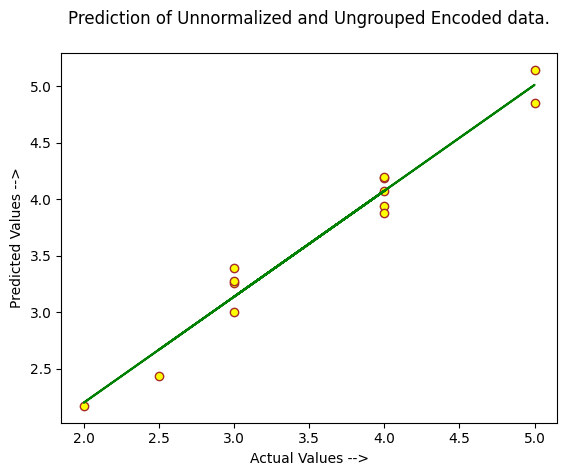

In [83]:
mplot.scatter(x = yTest, y = yPredict, color = 'yellow', edgecolor = 'brown')
mplot.xlabel('Actual Values -->')
mplot.ylabel('Predicted Values -->')
mplot.title('Prediction of Unnormalized and Ungrouped Encoded data.\n')

# Finding the slope and the intercept for the regression line.
# Finding the best fit line from a multiple linear regression problem.
# The 1 in the function defines the degree of the polynomial function.
slope, intercept = numpy.polyfit(yTest, yPredict, 1)
mplot.plot(yTest, slope*yTest + intercept, color = 'green')

mplot.show()

In [84]:
LR.coef_

array([-3.15163287e-02, -1.13686107e-03,  1.27818587e-01, -3.13685639e-01,
       -4.14659178e-02, -4.86959116e-02,  8.85264471e-02,  3.19598562e-01,
       -5.55866125e-01, -3.39119641e-02,  3.70937770e-01, -1.00758244e-01,
       -4.41433517e-01,  5.99873653e-02,  4.30566153e-01, -2.92623136e-01,
       -1.64271213e-01,  3.05475969e-01,  6.76414757e-02,  1.44484350e-01,
        3.55630480e-01,  5.33137264e-02,  2.33875931e-03,  1.09577164e-01,
        2.34845013e-01, -5.40876105e-01,  1.51809470e-01,  2.86555390e-01,
        3.47907957e-01, -2.42938208e-01, -6.39933114e-02, -1.20784869e-02,
        2.35216858e-01, -3.23046520e-01, -4.00875240e-01, -3.03214395e-01,
        3.68214199e-01, -1.17504016e+00, -1.37383451e+00,  1.04470108e+00,
       -1.23822092e-01,  5.02528529e-01, -1.59614134e-01,  1.15452267e-01,
        2.14748567e-01,  1.36531261e-01,  3.36872786e-01,  1.13262215e-01])

In [85]:
LR.intercept_

4.330258448673121

##### Calculating the performance of the model

In [86]:
mae = mean_absolute_error(yTest, yPredict)
mse = mean_squared_error(yTest, yPredict)
rmse = root_mean_squared_error(yTest, yPredict)

##### Printing the performance metrics

In [87]:
print(f'Accuracy of the model : {accuracy}')
print(f'Mean Absolute Error of the model : {mae}')
print(f'Mean Squared Error of the model : {mse}')
print(f'Root Mean Squared Error of the model : {rmse}')

Accuracy of the model : 0.9528752902600035
Mean Absolute Error of the model : 0.16101306154992437
Mean Squared Error of the model : 0.03597093228674289
Root Mean Squared Error of the model : 0.1896600439911973


### Model Improvement
##### Tuning the model using the Hyperparameter Tuning method.
Multiple Linear Regression in Python can be done using regularization techniques like Ridge Regression and Lasso Regression.

##### Hyperparameter tuning for Ridge Regression using GridSearchCV technique

In [88]:
# Defining the Ridge Model
ridge = Ridge()

# Defining the parameter grid
parameterGrid = {'alpha' : [0.01, 0.1, 1, 10, 100, 1000]}

# Define the Grid Search
GridSearch = GridSearchCV(ridge, param_grid = parameterGrid, cv = 5, scoring = 'neg_mean_squared_error')

# Fitting the Grid Search
GridSearch.fit(xTrain, yTrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [89]:
# Printing the best parameters and score
print(f"Best parameters: {GridSearch.best_params_}")
print(f"Best score: {-GridSearch.best_score_}")

Best parameters: {'alpha': 10}
Best score: 0.4985028146943156


In [90]:
# Evaluating the best model on the test dataset
bestModel = GridSearch.best_estimator_
testScore = bestModel.score(xTest, yTest)
print(f"Test score: {testScore}")

Test score: 0.8953766501661957


##### Hyperparameter Tuning for Lasso Regression using GridSearchCV technique.

In [91]:
# Defining the model
lasso = Lasso()

# Defining the parameter grid
paramGrid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Defining the grid search
GridSearch = GridSearchCV(lasso, paramGrid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
GridSearch.fit(xTrain, yTrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [92]:
# Prnting the best parameters and score
print(f"Best parameters: {GridSearch.best_params_}")
print(f"Best score: {-GridSearch.best_score_}")

Best parameters: {'alpha': 0.01}
Best score: 0.5172621794400057


In [105]:
# Evaluating the best model on the test dataset
bestModel = GridSearch.best_estimator_
testScore = bestModel.score(xTest, yTest)
print(f"Test score: {testScore}")

Test score: 0.8586267243570286


##### Model saving using the TensorFlow save method

In [139]:
modelTF = Sequential()
modelTF.add(Dense(units = 1, input_shape = (xTrain.shape[1], )))

c:\Users\Avik Chakraborty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
modelTF.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [141]:
modelTF.fit(xTrain, yTrain, epochs = 1000, verbose = 0)

In [147]:
yPredict_TF = modelTF.predict(xTest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [188]:
yPredict_TF = yPredict_TF.flatten().tolist()

In [191]:
newTF_DF = {}
newTF_DF.update({'yPredict_TF' : yPredict_TF, 'yTest' : yTest.values.tolist()})

In [192]:
newTF_DF

{'yPredict_TF': [3.629863739013672,
  3.8855831623077393,
  2.5340497493743896,
  3.6369264125823975,
  4.488362789154053,
  3.4228675365448,
  2.9817728996276855,
  5.227105617523193,
  4.611131191253662,
  2.684009075164795,
  4.6759443283081055,
  3.5308115482330322,
  4.067777633666992],
 'yTest': [4.0, 4.0, 2.5, 3.0, 4.0, 3.0, 3.0, 5.0, 5.0, 2.0, 4.0, 3.0, 4.0]}

In [193]:
newTF_DF = pandas.DataFrame(data = newTF_DF, columns = ['yPredict_TF', 'yTest'])
newTF_DF

,yPredict_TF,yTest
0,3.629864,4.0
1,3.885583,4.0
2,2.534050,2.5
3,3.636926,3.0
4,4.488363,4.0
5,3.422868,3.0
6,2.981773,3.0
7,5.227106,5.0
8,4.611131,5.0
9,2.684009,2.0


In [194]:
modelTF.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149 (600.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100 (404.00 B)

In [197]:
# Saving the model
modelTF.save('saved models/orange_quality_TFModel.keras')

### Conclusion

1. From the above project we can conclude that the model gave an accurate predictions with the accuracy score of 0.9528752902600035. <br>
2. All the key findings have been noted and visually displayed. <br>
3. All the points from the task list have been covered. <br>
4. Model is saved in the 'saved models' file path of the working directory. <br>